In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Functions import Basic_info_func
import warnings
warnings.filterwarnings('ignore')

In [69]:
df = pd.read_csv('/Users/ayush/Desktop/San Diego/AAI-500/TEAM PROJECT/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [70]:
Basic_info_func(df)

,Missing_values,N_uniques,Data_type,missing_percentage
Feature,,,,
Administrative,0,27,int64,0
Administrative_Duration,0,3335,float64,0
Informational,0,17,int64,0
Informational_Duration,0,1258,float64,0
ProductRelated,0,311,int64,0
ProductRelated_Duration,0,9551,float64,0
BounceRates,0,1872,float64,0
ExitRates,0,4777,float64,0
PageValues,0,2704,float64,0


In [71]:
cat_feaures = ['VisitorType', 'Month', 'OperatingSystems', 'peratingSystems', 'VisitorType', 'Weekend', 
               'Region', 'Browser', 'SpecialDay']

## 2. Data Preprocessing

In [72]:
# Check for missing values
missing_values = df.isnull().sum()

# Get summary statistics for numerical columns
summary_statistics = df.describe()

# Display the first few rows of the dataset
head_data = df.head()

missing_values, summary_statistics, head_data


(Administrative             0
 Administrative_Duration    0
 Informational              0
 Informational_Duration     0
 ProductRelated             0
 ProductRelated_Duration    0
 BounceRates                0
 ExitRates                  0
 PageValues                 0
 SpecialDay                 0
 Month                      0
 OperatingSystems           0
 Browser                    0
 Region                     0
 TrafficType                0
 VisitorType                0
 Weekend                    0
 Revenue                    0
 dtype: int64,
        Administrative  Administrative_Duration  Informational  \
 count    12330.000000             12330.000000   12330.000000   
 mean         2.315166                80.818611       0.503569   
 std          3.321784               176.779107       1.270156   
 min          0.000000                 0.000000       0.000000   
 25%          0.000000                 0.000000       0.000000   
 50%          1.000000                 7.500000  

## 2. EDA

### 2.1 Target Variable analysis

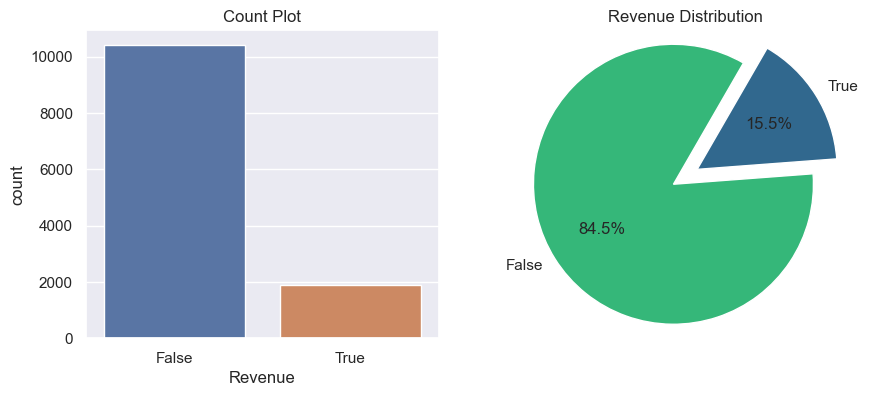

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style('darkgrid')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Count plot
sns.countplot(data=df, x='Revenue', ax=ax[0])
ax[0].set_title('Count Plot')

# Prepare data for pie chart
revenue_counts = df['Revenue'].value_counts()
labels = revenue_counts.index
sizes = revenue_counts.values

# Pie chart
explode = [0.1] * len(labels)  # Explode all slices equally
ax[1].pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=60, colors=sns.color_palette("viridis_r", len(labels)))
ax[1].set_title('Revenue Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
ax[1].axis('equal')

# Display the plot
plt.show()


In [74]:
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', ]

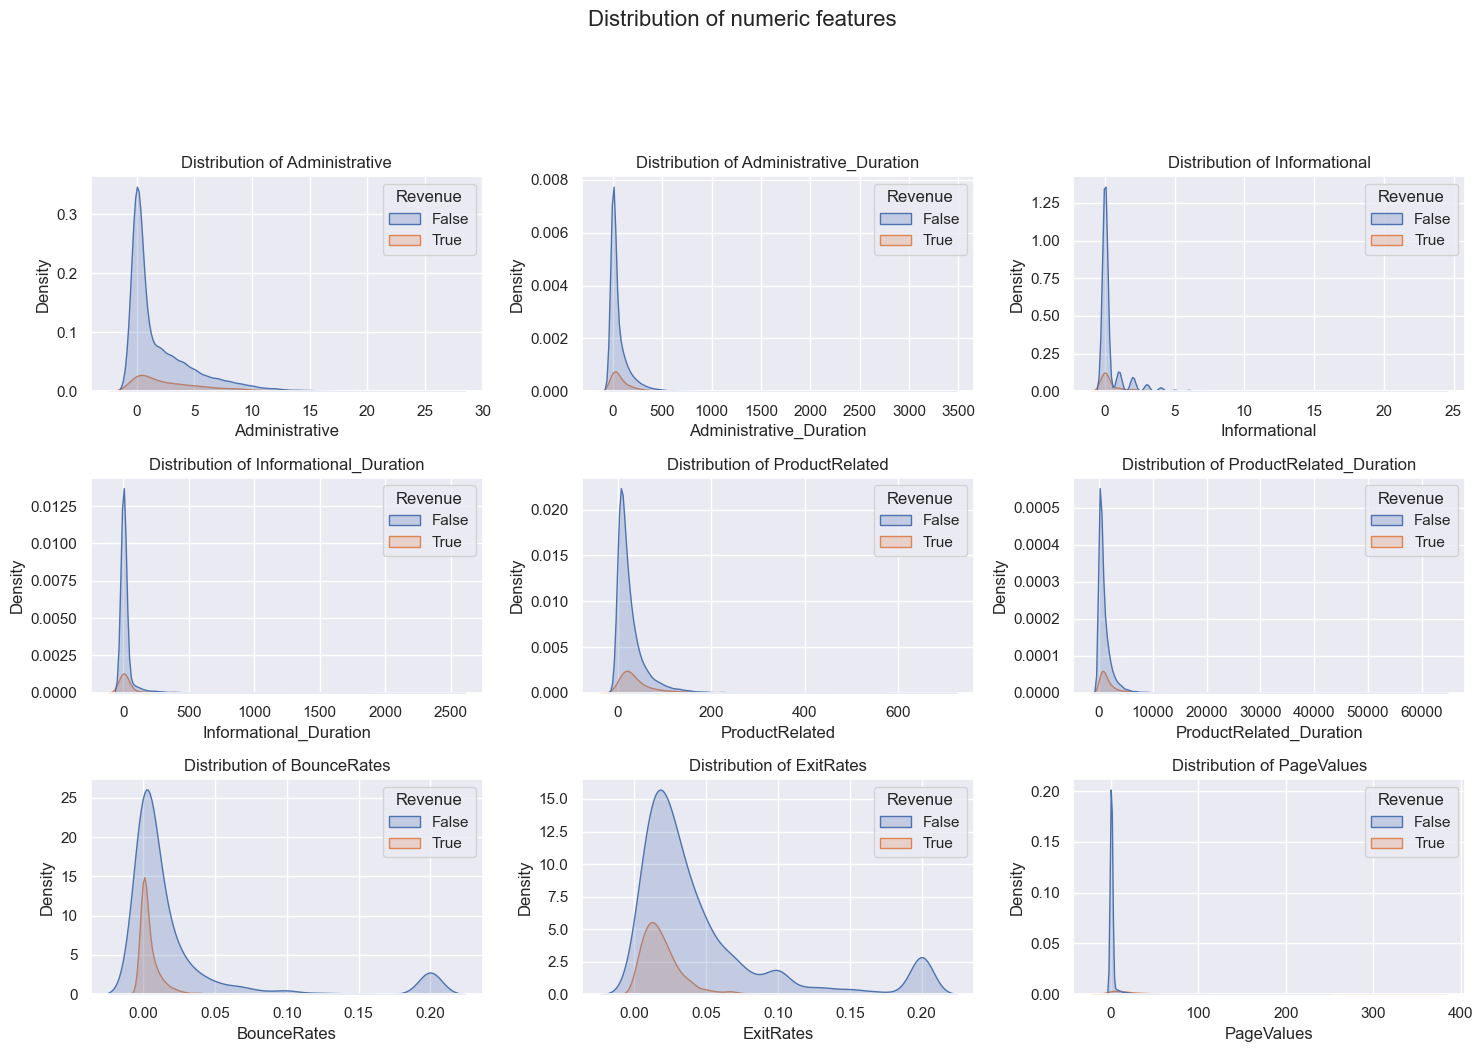

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'numeric_features' is your list of numeric features
# Create the subplots
sns.set_style('darkgrid')
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# Flatten the axes array for easy iteration
ax_flat = ax.flatten()

# Iterate over each element property and corresponding axis
for num_feature, axis in zip(numeric_features, ax_flat):
    sns.kdeplot(data=df, x=num_feature, color='b', ax=axis, fill = True, hue= 'Revenue')
    axis.set_title(f'Distribution of {num_feature}')


plt.suptitle('Distribution of numeric features', fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [76]:
cat_features = ['SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', ]

## 2.3 Analysis on Categoricl variables

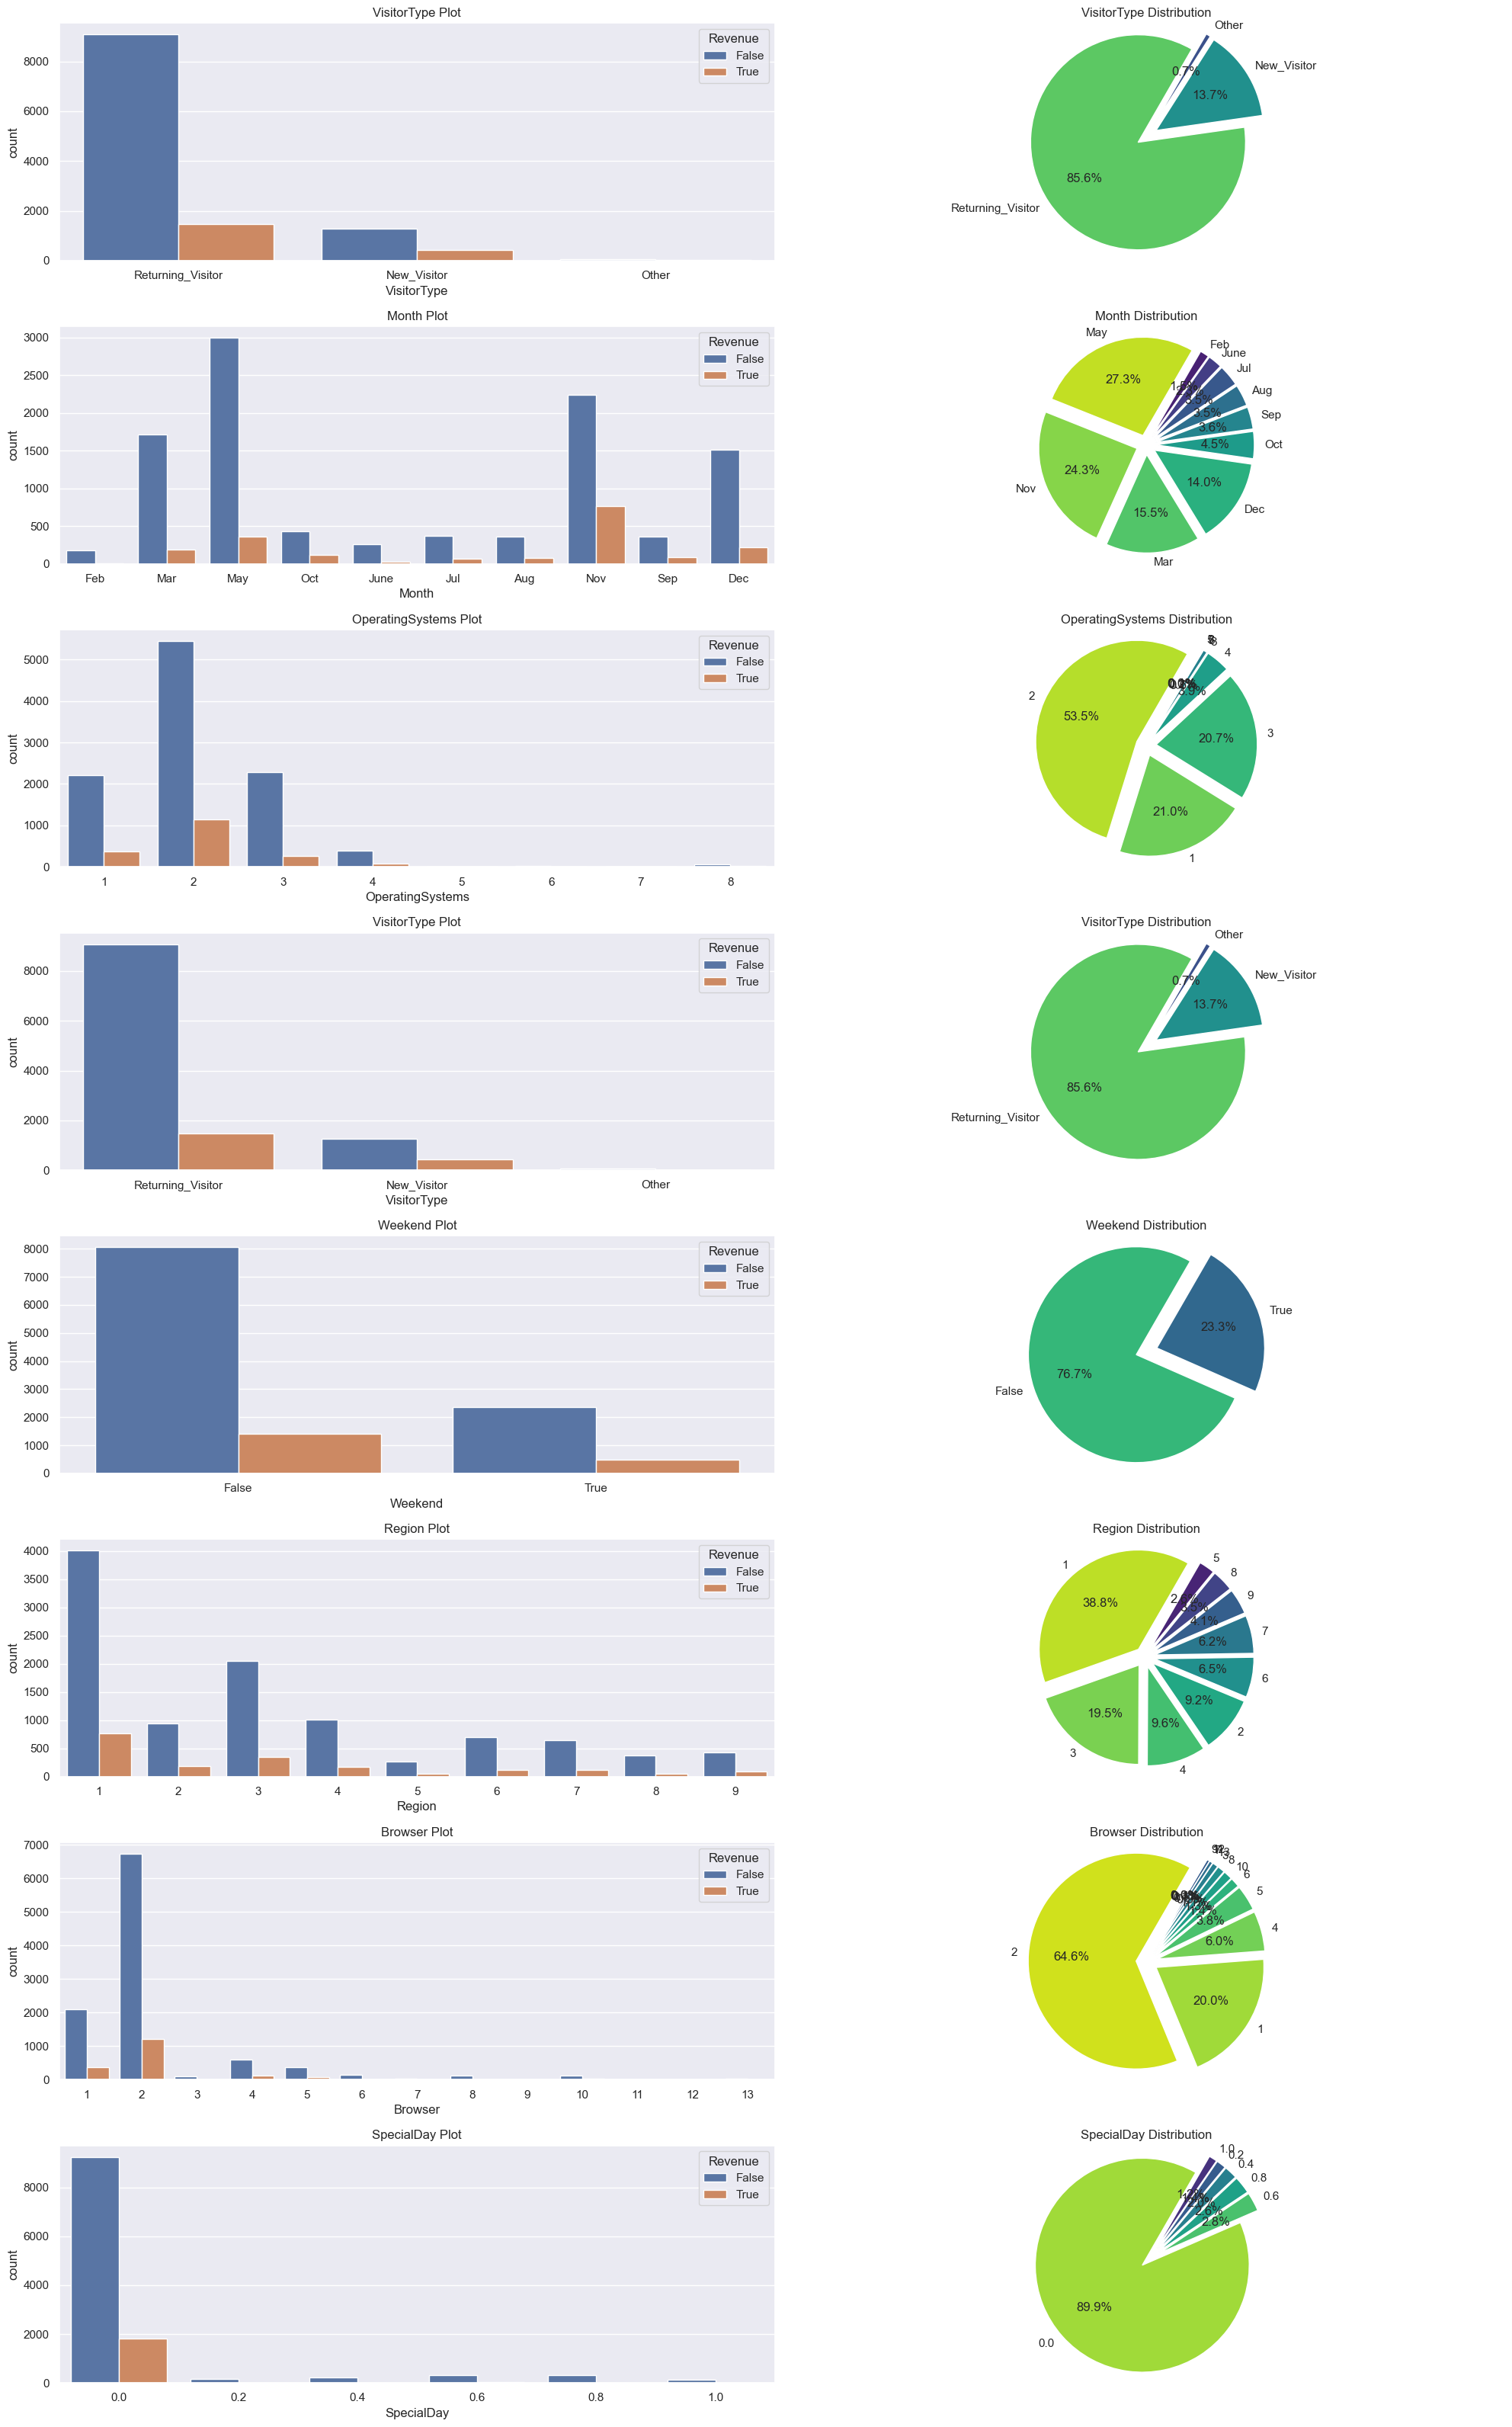

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame (assuming df is already defined)
# df = pd.read_csv('your_data.csv')

cat_features = ['VisitorType', 'Month', 'OperatingSystems', 'VisitorType', 'Weekend', 'Region', 'Browser', 'SpecialDay']

# Calculate the number of rows and columns needed for the subplots
num_features = len(cat_features)
num_plots = num_features * 2  # Two plots per feature
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 4))

for idx, feature in enumerate(cat_features):
    row = idx * 2 // num_cols
    col_count = idx * 2 % num_cols
    col_pie = col_count + 1
    
    # Count plot
    sns.countplot(data=df, x=feature, ax=axes[row, col_count], hue='Revenue')
    axes[row, col_count].set_title(f'{feature} Plot')
    
    # Prepare data for pie chart
    revenue_counts = df[feature].value_counts()
    labels = revenue_counts.index
    sizes = revenue_counts.values
    
    # Pie chart
    explode = [0.1] * len(labels)  # Explode all slices equally
    axes[row, col_pie].pie(sizes, labels=labels, autopct='%1.1f%%', explode=explode, startangle=60, colors=sns.color_palette("viridis_r", len(labels)))
    axes[row, col_pie].set_title(f'{feature} Distribution')
    axes[row, col_pie].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


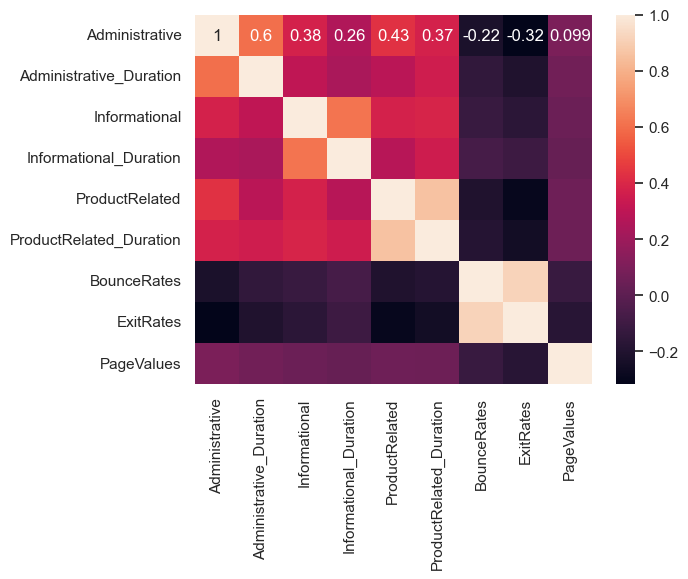

In [78]:
sns.heatmap(df[numeric_features].corr(), annot = True)
plt.show()

In [79]:
pd.crosstab(df['Revenue'], df['VisitorType'])

VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
False,1272,69,9081
True,422,16,1470
